In [104]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
import random
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

把科學記號改成十進位

In [105]:
# import pandas as pd
# import decimal
# 
# # 讀取CSV文件，確保資料的精度
# df = pd.read_csv('data/combined_dataset_all.csv', encoding='utf-8-sig', dtype=str)
# 
# # 將Chlorophyll欄位轉換為不使用科學記號的小數形式
# df['Chlorophyll'] = df['Chlorophyll'].apply(lambda x: format(decimal.Decimal(x), 'f'))
# 
# # 輸出篩選後的結果到原本的CSV文件
# df.to_csv('data/combined_dataset_all.csv', index=False, encoding='utf-8-sig')
# 

先取出10000筆來test看看

In [106]:
import pandas as pd

# 讀取CSV文件
combined_df = pd.read_csv("data_all/combined_20230918031530_Himawari_202309180310.csv")

# 隨機選取10000筆資料
sampled_df = combined_df.sample(n=10000, random_state=1)

# 保存為新的CSV文件
sampled_df.to_csv("data_all/test_temp/train_combined_dataset_all.csv", index=False)

print("已成功從 combined_dataset_all.csv 中選取 10000 筆資料並保存到 data_/train_combined_dataset_all.csv")


已成功從 combined_dataset_all.csv 中選取 10000 筆資料並保存到 data_/train_combined_dataset_all.csv


不取的版本

In [107]:
data = pd.read_csv("data_all/combined_20230918031530_Himawari_202309180310.csv")

In [44]:
data = pd.read_csv("data_all/test_temp/train_combined_dataset_all.csv")

In [108]:
data.info()
data.describe()
data.shape
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21968067 entries, 0 to 21968066
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   GOCI2_Latitude      float64
 1   GOCI2_Longitude     float64
 2   Himawari_Latitude   float64
 3   Himawari_Longitude  float64
 4   Chlorophyll         float64
 5   Albedo_01           float64
 6   Albedo_02           float64
 7   Albedo_03           float64
 8   Albedo_04           float64
dtypes: float64(9)
memory usage: 1.5 GB
Index(['GOCI2_Latitude', 'GOCI2_Longitude', 'Himawari_Latitude',
       'Himawari_Longitude', 'Chlorophyll', 'Albedo_01', 'Albedo_02',
       'Albedo_03', 'Albedo_04'],
      dtype='object')


### output filtered csv

In [109]:
# 選擇所需的列
selected_columns = ['Albedo_01', 'Albedo_02', 'Albedo_03', 'Albedo_04', 'Chlorophyll']

# 過濾數據
filtered_data = data[selected_columns]

## 重命名列，去掉 '2km_'
#filtered_data.columns = ['albedo_01', 'albedo_02', 'albedo_03', 'albedo_04', 'Chlorophyll']
#
# 將過濾後的數據寫入新的CSV文件
filtered_data.to_csv("data_all/test_temp/train_nn_filtered_data.csv", index=False)

print("新的 CSV 文件已成功輸出，文件名為 data_all/test_temp/train_nn_filtered_data.csv")

新的 CSV 文件已成功輸出，文件名為 data_all/test_temp/train_nn_filtered_data.csv


移除包含 '<' 符號的行(因非海保署資料，故已不再需要)

In [110]:
# import pandas as pd
# 
# # 讀取CSV文件，確保資料的精度
# df = pd.read_csv('data/train_nn_filtered_data.csv', encoding='utf-8-sig', dtype=str)
# 
# # 移除包含 '<' 符號的行
# filtered_df = df[~df.apply(lambda row: row.str.contains('<|,').any(), axis=1)]
# 
# # 輸出篩選後的結果到新的CSV文件
# filtered_df.to_csv('data/train_filtered_and_trimmed_data.csv', index=False, encoding='utf-8-sig')
# 

科學記號轉小數看看

In [111]:
import pandas as pd
import decimal

# 讀取CSV文件，確保資料的精度
df = pd.read_csv('data_all/test_temp/train_nn_filtered_data.csv', encoding='utf-8-sig', dtype=str)

# 將Chlorophyll欄位轉換為不使用科學記號的小數形式
df['Chlorophyll'] = df['Chlorophyll'].apply(lambda x: format(decimal.Decimal(x), 'f'))

# 輸出篩選後的結果到原本的CSV文件
df.to_csv('data_all/test_temp/train_nn_filtered_data.csv', index=False, encoding='utf-8-sig')

資料的描述以及葉綠素值的分布圖

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21968067 entries, 0 to 21968066
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Albedo_01    float64
 1   Albedo_02    float64
 2   Albedo_03    float64
 3   Albedo_04    float64
 4   Chlorophyll  float64
dtypes: float64(5)
memory usage: 838.0 MB
          Albedo_01     Albedo_02     Albedo_03     Albedo_04   Chlorophyll
count  2.196807e+07  2.196807e+07  2.196807e+07  2.196807e+07  2.196807e+07
mean   1.322056e-01  9.434757e-02  4.596500e-02  2.974926e-02  4.159860e-01
std    3.572495e-02  3.608900e-02  3.812742e-02  4.854805e-02  9.919111e-01
min    8.620000e-02  5.700000e-02  2.320000e-02  1.800000e-03  0.000000e+00
25%    1.171000e-01  7.900000e-02  3.150000e-02  1.370000e-02  1.180935e-01
50%    1.242000e-01  8.679999e-02  3.770000e-02  1.840000e-02  2.069688e-01
75%    1.343000e-01  9.630000e-02  4.520000e-02  2.500000e-02  4.516963e-01
max    9.590000e-01  8.741000e-01  8.464000e-01  9.543

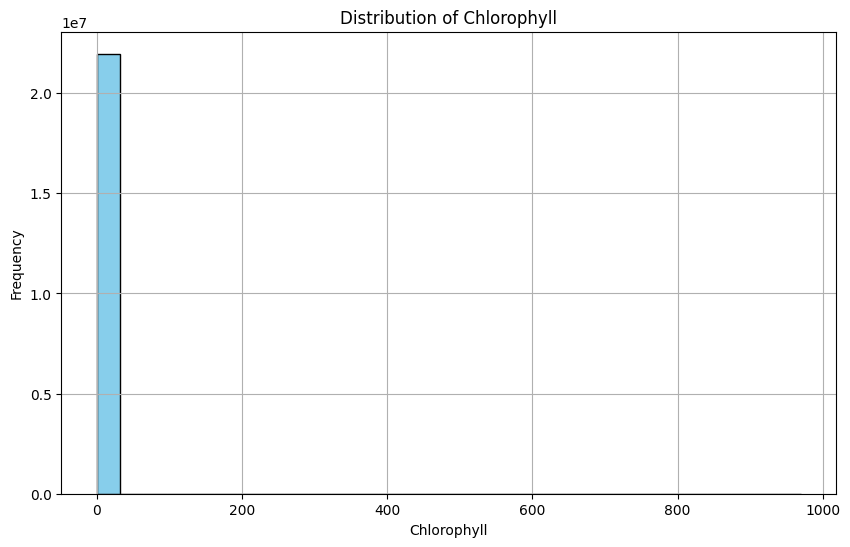

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取CSV文件
data = pd.read_csv("data_all/test_temp/train_nn_filtered_data.csv")

# 確認數據的資訊
data.info()

# 顯示基本統計描述
print(data.describe())

# 顯示數據的形狀
print(data.shape)

# 顯示數據的欄位名稱
print(data.columns)

# 畫出Chlorophyll的分布圖
plt.figure(figsize=(10, 6))
plt.hist(data['Chlorophyll'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Chlorophyll')
plt.xlabel('Chlorophyll')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()







去除極端值

原始數據的描述性統計量:
count    2.196807e+07
mean     4.159860e-01
std      9.919111e-01
min      0.000000e+00
25%      1.180935e-01
50%      2.069688e-01
75%      4.516963e-01
max      9.700646e+02
Name: Chlorophyll, dtype: float64

過濾後數據的描述性統計量:
count    2.196776e+07
mean     4.144373e-01
std      7.058481e-01
min      0.000000e+00
25%      1.180927e-01
50%      2.069645e-01
75%      4.516813e-01
max      2.997533e+01
Name: Chlorophyll, dtype: float64


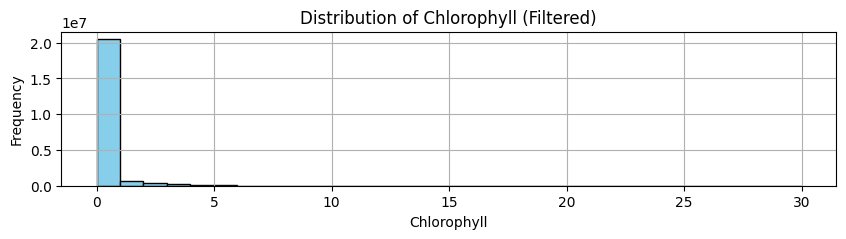

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取CSV文件
data = pd.read_csv("data_all/test_temp/train_nn_filtered_data.csv")

# 顯示原始數據的描述性統計量
print("原始數據的描述性統計量:")
print(data['Chlorophyll'].describe())

# 去除Chlorophyll值大於10的極端值
data = data[data['Chlorophyll'] <= 30]

# 顯示過濾後數據的描述性統計量
print("\n過濾後數據的描述性統計量:")
print(data['Chlorophyll'].describe())

# 畫出過濾後Chlorophyll的分布圖
plt.figure(figsize=(10, 2))
plt.hist(data['Chlorophyll'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Chlorophyll (Filtered)')
plt.xlabel('Chlorophyll')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


data.to_csv('data_all/test_temp/train_nn_filtered_data_2stage.csv', index=False, encoding='utf-8-sig')

count

In [114]:
print(data.Chlorophyll.count())
print(data.Albedo_01.count())
print(data.Albedo_02.count())
print(data.Albedo_03.count())
print(data.Albedo_04.count())

21967757
21967757
21967757
21967757
21967757


In [115]:
train = data
train.info()
train.Chlorophyll.value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 21967757 entries, 0 to 21968066
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Albedo_01    float64
 1   Albedo_02    float64
 2   Albedo_03    float64
 3   Albedo_04    float64
 4   Chlorophyll  float64
dtypes: float64(5)
memory usage: 1005.6 MB


Chlorophyll
0.000000    306
0.119974     29
0.095531     25
0.091991     24
0.087188     24
           ... 
0.113980      1
0.113282      1
0.120043      1
0.113919      1
0.105903      1
Name: count, Length: 10127556, dtype: int64

In [116]:
X = train.drop('Chlorophyll', axis=1)
y = train.Chlorophyll
y.value_counts()

Chlorophyll
0.000000    306
0.119974     29
0.095531     25
0.091991     24
0.087188     24
           ... 
0.113980      1
0.113282      1
0.120043      1
0.113919      1
0.105903      1
Name: count, Length: 10127556, dtype: int64

### Scalar

In [117]:
scaler = StandardScaler()
# scale the data to make it easier for the model to learn
X = scaler.fit_transform(X)

### Predict

載入模型並進行預測

In [118]:
import joblib
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt



# 載入已保存的模型
loaded_model = joblib.load('model/mlp_regressor_model_0918_03_30_10%.pkl')
print("模型已成功載入")

# 讀取新的測試資料
new_test_data = pd.read_csv("data_all/test_temp/train_nn_filtered_data_2stage.csv")

# 選擇所需的特徵列
selected_columns = ['Albedo_01', 'Albedo_02', 'Albedo_03', 'Albedo_04']
X_new_test = new_test_data[selected_columns]

# 標準化數據
X_new_test = scaler.transform(X_new_test)

# 使用模型進行預測
new_test_predictions = loaded_model.predict(X_new_test)

# 將預測結果添加到資料框
new_test_data['Predicted_Chlorophyll'] = new_test_predictions

# 如果新測試資料包含實際的 Chlorophyll 值，計算評估指標
if 'Chlorophyll' in new_test_data.columns:
    # 計算誤差度量（MAE, RMSE, R2）
    mae = mean_absolute_error(new_test_data['Chlorophyll'], new_test_predictions)
    rmse = sqrt(mean_squared_error(new_test_data['Chlorophyll'], new_test_predictions))
    r2 = r2_score(new_test_data['Chlorophyll'], new_test_predictions)

    print(f"New Test MAE: {mae}")
    print(f"New Test RMSE: {rmse}")
    print(f"New Test R2: {r2}")

# 保存預測結果到新的CSV文件
new_test_data.to_csv("data_all/test_temp/new_test_predictions.csv", index=False, encoding='utf-8-sig')
print("新的測試預測結果已保存為 'data_all/test_temp/new_test_predictions.csv'")



模型已成功載入
New Test MAE: 0.1997439835888283
New Test RMSE: 0.5326268169511496
New Test R2: 0.43059202029876553
新的測試預測結果已保存為 'data_all/test_temp/new_test_predictions.csv'


## Plot

繪製實際值與預測值對比圖

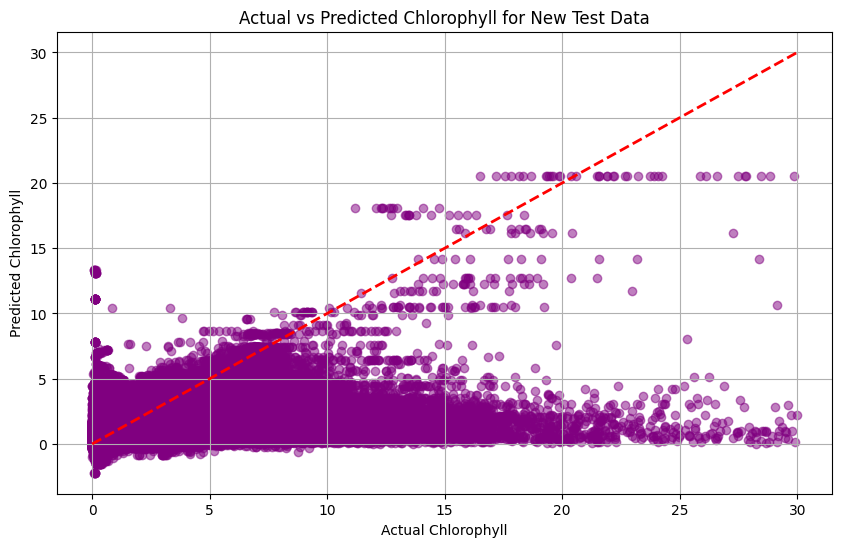

In [119]:
import matplotlib.pyplot as plt

# 如果有實際的 Chlorophyll 值，繪製實際值與預測值的對比圖
if 'Chlorophyll' in new_test_data.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(new_test_data['Chlorophyll'], new_test_data['Predicted_Chlorophyll'], alpha=0.5, color='purple')
    plt.plot([new_test_data['Chlorophyll'].min(), new_test_data['Chlorophyll'].max()], 
             [new_test_data['Chlorophyll'].min(), new_test_data['Chlorophyll'].max()], 'r--', lw=2)
    plt.title('Actual vs Predicted Chlorophyll for New Test Data')
    plt.xlabel('Actual Chlorophyll')
    plt.ylabel('Predicted Chlorophyll')
    plt.grid(True)
    plt.show()
else:
    # 如果沒有實際值，只繪製預測值的分布圖
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(new_test_predictions)), new_test_predictions, alpha=0.5, color='purple')
    plt.title('Predicted Chlorophyll for New Test Data')
    plt.xlabel('Sample Index')
    plt.ylabel('Predicted Chlorophyll')
    plt.grid(True)
    plt.show()


輸出不同解析度的圖

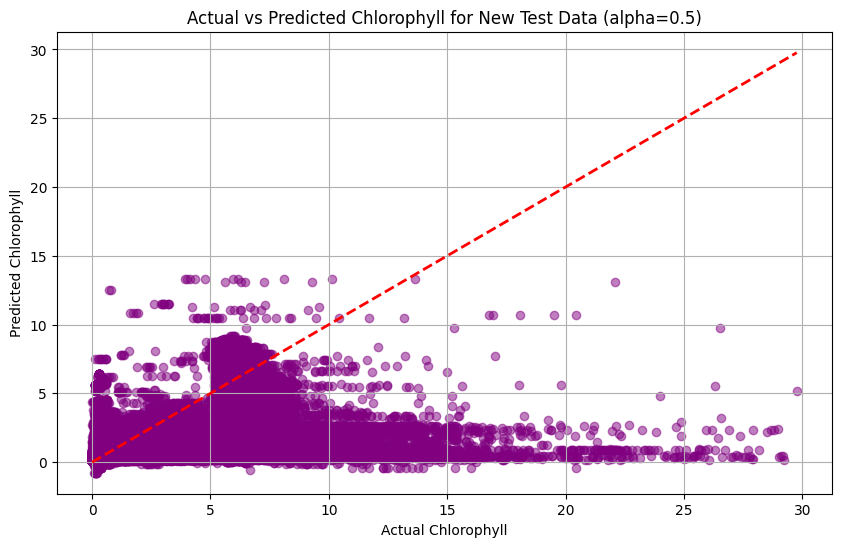

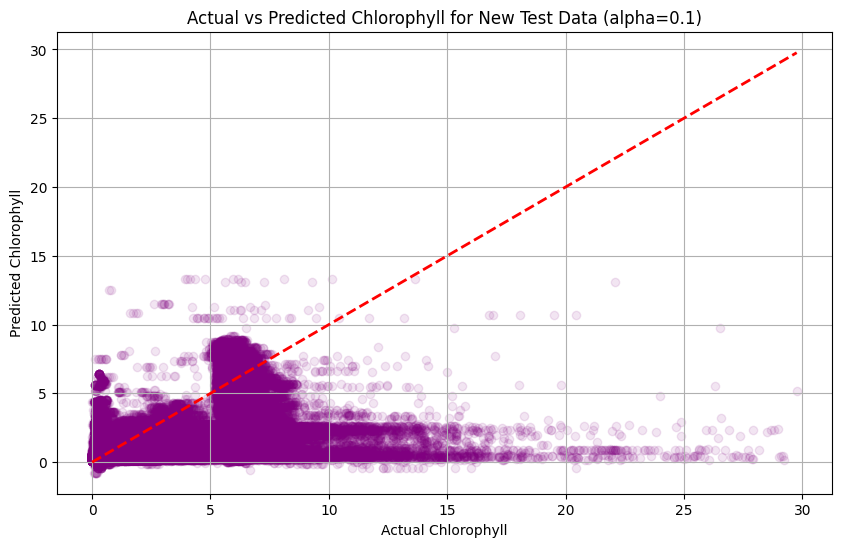

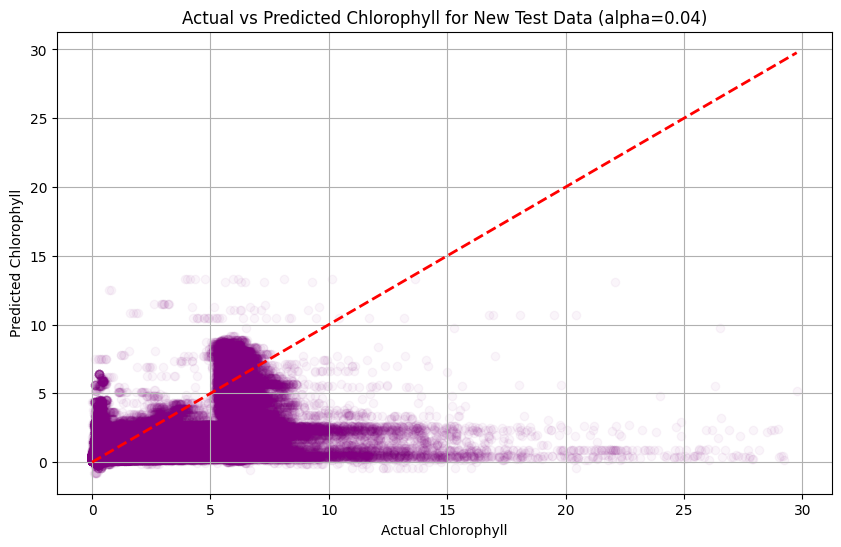

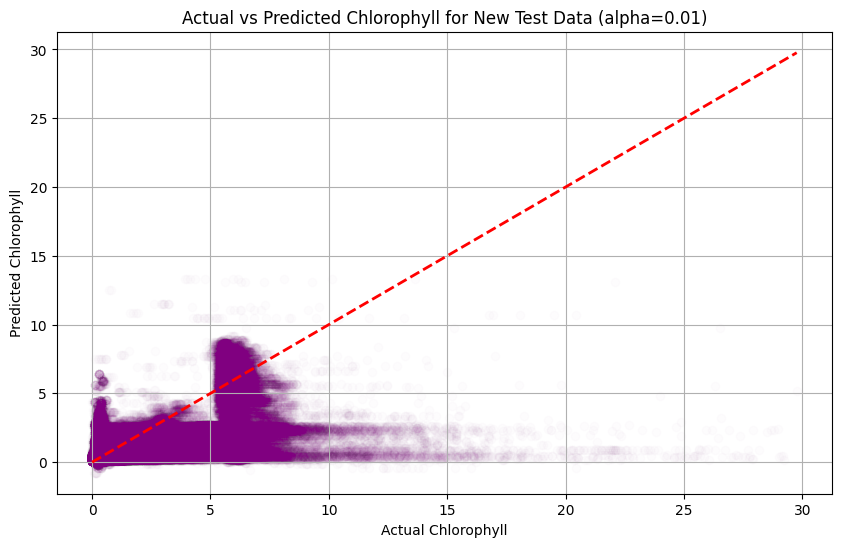

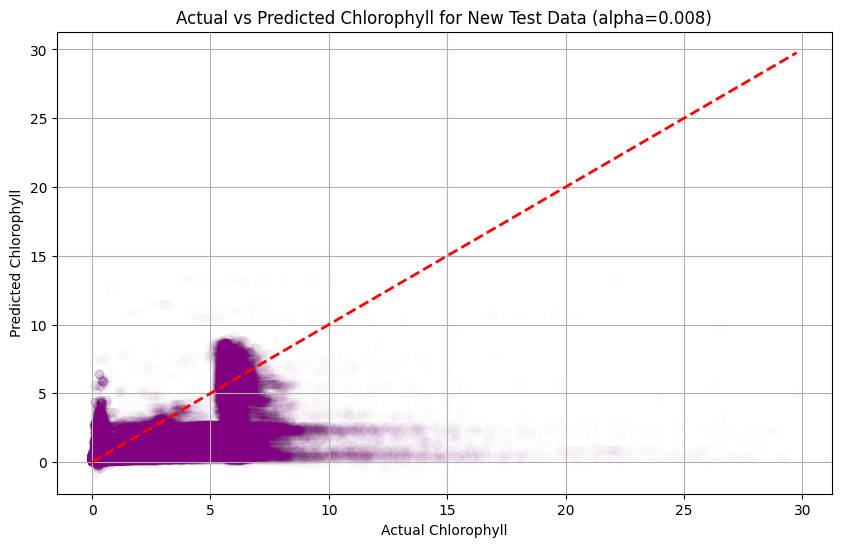

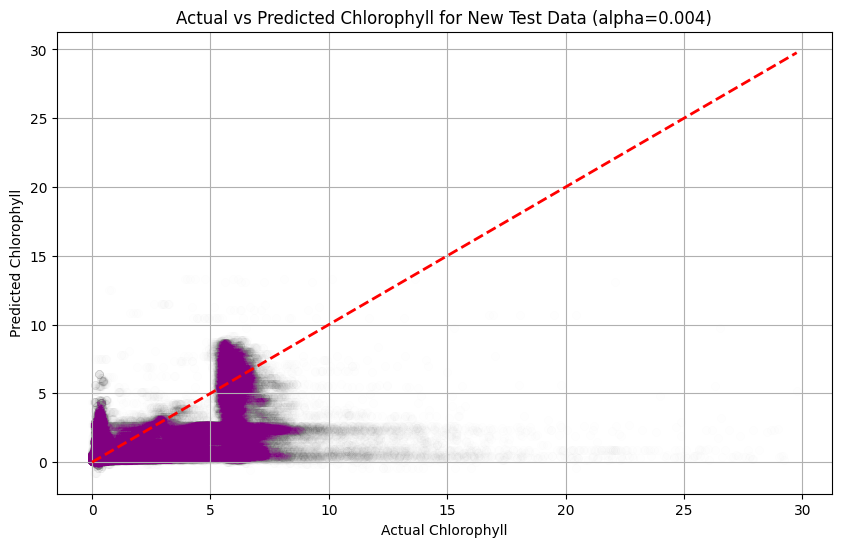

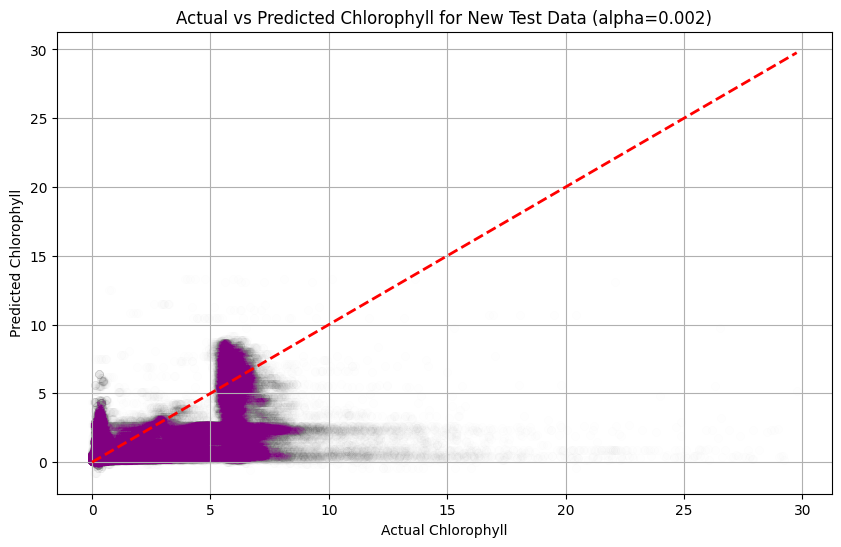

In [71]:
import matplotlib.pyplot as plt

# alpha值的列表
alpha_values = [0.5, 0.1, 0.04, 0.01, 0.008, 0.004, 0.002]

# 如果有實際的 Chlorophyll 值，繪製實際值與預測值的對比圖
if 'Chlorophyll' in new_test_data.columns:
    for alpha in alpha_values:
        plt.figure(figsize=(10, 6))
        plt.scatter(new_test_data['Chlorophyll'], new_test_data['Predicted_Chlorophyll'], alpha=alpha, color='purple')
        plt.plot([new_test_data['Chlorophyll'].min(), new_test_data['Chlorophyll'].max()], 
                 [new_test_data['Chlorophyll'].min(), new_test_data['Chlorophyll'].max()], 'r--', lw=2)
        plt.title(f'Actual vs Predicted Chlorophyll for New Test Data (alpha={alpha})')
        plt.xlabel('Actual Chlorophyll')
        plt.ylabel('Predicted Chlorophyll')
        plt.grid(True)
        plt.show()
else:
    # 如果沒有實際值，只繪製預測值的分布圖
    for alpha in alpha_values:
        plt.figure(figsize=(10, 6))
        plt.scatter(range(len(new_test_predictions)), new_test_predictions, alpha=alpha, color='purple')
        plt.title(f'Predicted Chlorophyll for New Test Data (alpha={alpha})')
        plt.xlabel('Sample Index')
        plt.ylabel('Predicted Chlorophyll')
        plt.grid(True)
        plt.show()
